## Data Cleaning Cust_info

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url="https://raw.githubusercontent.com/mdnjabir/rfmanalysis/refs/heads/main/cust_info.csv"
df = pd.read_csv(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  10000 non-null  int64 
 1   Gender      9812 non-null   object
 2   Age         10000 non-null  int64 
 3   Country     10000 non-null  object
 4   City        10000 non-null  object
dtypes: int64(2), object(3)
memory usage: 390.8+ KB


In [ ]:
print(df.describe(include='all'))

         CustomerID Gender           Age  Country    City
count   10000.00000   9812  10000.000000    10000   10000
unique          NaN      3           NaN        8     836
top             NaN   Male           NaN  Germany  Berlin
freq            NaN   4508           NaN     1463    1226
mean    15100.50000    NaN     49.710400      NaN     NaN
std      2886.89568    NaN     25.129056      NaN     NaN
min     10101.00000    NaN    -10.000000      NaN     NaN
25%     12600.75000    NaN     33.000000      NaN     NaN
50%     15100.50000    NaN     49.000000      NaN     NaN
75%     17600.25000    NaN     65.000000      NaN     NaN
max     20100.00000    NaN    150.000000      NaN     NaN


There are some problms with the data;


*   Negative values in Age
*   Maximum Age '150' seems unrealistics
*   Missing Values in Gender






In [ ]:
df['Gender'].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [ ]:
df.dropna(subset = ['Gender'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9812 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  9812 non-null   int64 
 1   Gender      9812 non-null   object
 2   Age         9812 non-null   int64 
 3   Country     9812 non-null   object
 4   City        9812 non-null   object
dtypes: int64(2), object(3)
memory usage: 459.9+ KB


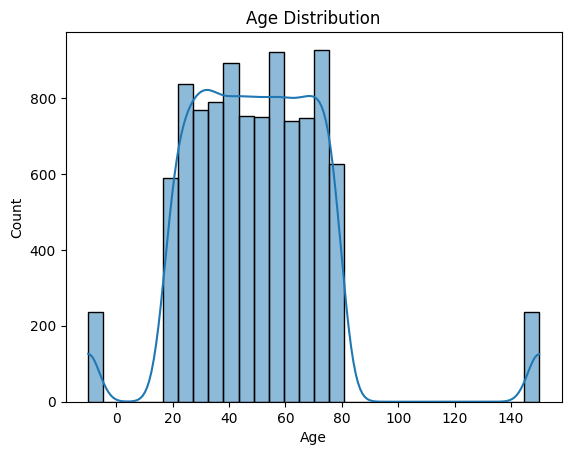

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

As the histogram shows, there are some outliers in both left and right side and those values as age seem unrealistic.

In [16]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

In [18]:
df['Age'].describe()

,Age
count,9340.000000
mean,48.752141
std,17.870036
min,18.000000
25%,33.000000
50%,49.000000
75%,64.000000
max,79.000000


In [19]:
df['City'].unique()

array(['Toronto', 'Jasonburgh', 'Singapore', 'Tokyo', 'Berlin', 'Paris',
       'Cape Town', 'Invalid_City', 'Rio de Janeiro', 'New Paul',
       'West Steven', 'South Cherylland', 'Johnborough', 'West Troy',
       'South Thomastown', 'Port Amanda', 'Lake Joelside', 'Sherriview',
       'East Richardville', 'Chavezside', 'Ramirezland', 'Rachelchester',
       'Jaredville', 'Lake Dalemouth', 'Andrewschester', 'East Jennifer',
       'Kimfort', 'East Erin', 'Thomasmouth', 'Eatonchester',
       'Lesliebury', 'Burgessborough', 'New Jessica', 'Tracyside',
       'Patrickfort', 'Aaronmouth', 'Estesburgh', 'West Amy',
       'Port Catherine', 'South Cassandra', 'Hamiltonberg',
       'Carrollmouth', 'West Melissaborough', 'Peggychester',
       'Bethchester', 'Port Kevin', 'East Tara', 'South Shaunland',
       'Youngborough', 'North Jason', 'Holmeshaven', 'Williamton',
       'South Justin', 'East Briantown', 'South Stephanie',
       'Port Robertton', 'East Audrey', 'Garnerville',
       

In [20]:
df['Country'].unique()

array(['Canada', 'Germany', 'Singapore', 'Invalid_Country', 'France',
       'South Africa', 'Brazil', 'Japan'], dtype=object)

In [23]:
df = df[df['Country'] != 'Invalid_Country']
df['Country'].unique()

array(['Canada', 'Germany', 'Singapore', 'France', 'South Africa',
       'Brazil', 'Japan'], dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9060 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  9060 non-null   int64 
 1   Gender      9060 non-null   object
 2   Age         9060 non-null   int64 
 3   Country     9060 non-null   object
 4   City        9060 non-null   object
dtypes: int64(2), object(3)
memory usage: 424.7+ KB


In [25]:
df.to_csv('cleaned_cust_info.csv', index=False)

from google.colab import files
files.download('cleaned_cust_info.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Cleaning Transaction

In [33]:
url2 = "https://raw.githubusercontent.com/mdnjabir/rfmanalysis/refs/heads/main/transactions.csv"
df2 = pd.read_csv(url2)
df2.head()

,CustomerID,BranchID,LastPurchaseDate,TotalTransactions,TotalSpent,Currency,PaymentType
0,10101,BR-007,02-10-2024,3,1139.520646,EUR,Credit
1,10102,BR-004,29-03-2023,3,1505.257642,EUR,Credit
2,10103,BR-001,10-09-2024,2,1047.562892,USDT,Instant
3,10104,BR-004,09-10-2024,2,1332.327171,USD,Credit
4,10105,BR-004,04-10-2024,5,1392.766062,GBP,Instant


In [27]:
valid_ids = df['CustomerID'].unique()

In [28]:
df2_filtered = df2[df2['CustomerID'].isin(valid_ids)]

In [29]:
df2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9060 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         9060 non-null   int64  
 1   BranchID           9060 non-null   object 
 2   LastPurchaseDate   9060 non-null   object 
 3   TotalTransactions  9060 non-null   int64  
 4   TotalSpent         9060 non-null   float64
 5   Currency           9060 non-null   object 
 6   PaymentType        9060 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 566.2+ KB


In [32]:
df2_filtered.describe()

,CustomerID,TotalTransactions,TotalSpent
count,9060.000000,9060.000000,9060.000000
mean,15109.548896,2.991832,6357.575222
std,2883.572587,1.720040,25068.285833
min,10101.000000,0.000000,-69916.753290
25%,12614.750000,2.000000,681.844553
50%,15111.500000,3.000000,1027.541868
75%,17607.250000,4.000000,1404.013771
max,20100.000000,12.000000,257773.516500


There are negative values in total Spent, which is impossible.

In [41]:
df2_filtered = df2_filtered[df2_filtered['TotalSpent'] >= 0]
df2_filtered.describe()

,CustomerID,TotalTransactions,TotalSpent
count,8858.000000,8858.000000,8858.000000
mean,15111.492662,2.993114,6533.761967
std,2881.118142,1.718359,25302.928826
min,10101.000000,0.000000,1.484643
25%,12626.250000,2.000000,706.640435
50%,15115.500000,3.000000,1041.325249
75%,17607.750000,4.000000,1412.627602
max,20100.000000,12.000000,257773.516500


In [42]:
df2_filtered['PaymentType'].unique()

array(['Credit', 'Instant'], dtype=object)

In [43]:
df2_filtered['Currency'].unique()

array(['EUR', 'USDT', 'USD', 'GBP'], dtype=object)

In [44]:
df2_filtered['BranchID'].unique()

array(['BR-007', 'BR-001', 'BR-004', 'BR-002', 'BR-003', 'BR-006',
       'BR-005'], dtype=object)

In [51]:
df2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8858 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         8858 non-null   int64  
 1   BranchID           8858 non-null   object 
 2   LastPurchaseDate   8858 non-null   object 
 3   TotalTransactions  8858 non-null   int64  
 4   TotalSpent         8858 non-null   float64
 5   Currency           8858 non-null   object 
 6   PaymentType        8858 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 553.6+ KB


In [48]:
df2_filtered.to_csv('cleaned_transactions.csv', index=False)

from google.colab import files
files.download('cleaned_transactions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
valid_ids = df2_filtered['CustomerID'].unique()

In [50]:
df_cleaned = df[df['CustomerID'].isin(valid_ids)]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8858 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  8858 non-null   int64 
 1   Gender      8858 non-null   object
 2   Age         8858 non-null   int64 
 3   Country     8858 non-null   object
 4   City        8858 non-null   object
dtypes: int64(2), object(3)
memory usage: 415.2+ KB


In [49]:
df_cleaned.to_csv('cleaned_cust_info.csv', index=False)

from google.colab import files
files.download('cleaned_cust_info.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After cleaning both customer_info and transaction data, we have 8858 customer details to proceed with RFM Analysis.